In [207]:
import warnings
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def preprocess_data(df,region,forecast):
    df=df[df['Product Segment'].isin(['Exterior','Interior'])]
    df=df[df['Region Name']!='Export/Interco']
    df=df[df['Region Name']==region]
    df=df[df['forecast_group'].isin(forecast)]
    df=df[['Order Create Date','Order Volume (STD)']]
    df['Order Create Date']=pd.to_datetime(df['Order Create Date'])
    df=df.sort_values(by='Order Create Date')
    df=df.reset_index(drop=True)
    df['year'] = df['Order Create Date'].dt.year
    df['month'] = df['Order Create Date'].dt.month
    df = df.groupby(['year', 'month'])['Order Volume (STD)'].sum().reset_index()
    df['date']=df['year'].astype('string')+'-'+df['month'].astype('string')+'-01'
    df.set_index('date',inplace=True)
    df=df.drop(['year','month'],axis=1)
    df.index=pd.to_datetime(df.index)
    return df

In [126]:
df=pd.read_parquet('tezcatli_orders_data.parquet')

In [70]:
forecast_groups  = ["C+ St Plk",
                    "C+ St NT3",
                    "Pr Plk",
                    "Pr HLD",
                    "Pr Pnl",
                    "C+ St Pnl",
                    "C+ St HTG",
                    "Pr Soff 12'",
                    "Pr CemPre",
                    "Pr NT3",
                    "C+ St HLD",
                    "Pr Soff 8'"]

In [127]:
df=df[df['Product Segment'].isin(['Exterior','Interior'])]
df=df[df['Region Name']!='Export/Interco']

In [128]:
df=df[df['Region Name']=='Mountain']

In [26]:
df=df[df['forecast_group'].isin(forecast_groups)]

In [73]:
df=df[['Order Create Date','Order Volume (STD)','Region Name','forecast_group']]

In [66]:
df['Order Create Date']=pd.to_datetime(df['Order Create Date'])
df=df.sort_values(by='Order Create Date')
df=df.reset_index(drop=True)
df['year'] = df['Order Create Date'].dt.year
df['month'] = df['Order Create Date'].dt.month
df = df.groupby(['year', 'month'])['Order Volume (STD)'].sum().reset_index()
df['date']=df['year'].astype('string')+'-'+df['month'].astype('string')+'-01'
df.set_index('date',inplace=True)

In [30]:
df1=df

In [75]:
df['Order Create Date']=pd.to_datetime(df['Order Create Date'])

In [77]:
df1


,Order Create Date,Order Volume (STD),Region Name,forecast_group,year,month
0,2013-04-01,64.0,Mountain,C+ St Pnl,2013,4
1,2013-04-01,3465.0,Mountain,C+ St Plk,2013,4
2,2013-04-01,1732.5,Mountain,C+ St Plk,2013,4
3,2013-04-01,3850.0,Mountain,Pr Plk,2013,4
4,2013-04-01,1824.0,Mountain,Pr CemPre,2013,4
...,...,...,...,...,...,...
139616,2023-07-31,1600.0,Mountain,Pr Pnl,2023,7
139617,2023-07-31,3600.0,Mountain,Pr Pnl,2023,7
139618,2023-07-31,38000.0,Mountain,Pr Pnl,2023,7
139619,2023-07-31,4000.0,Mountain,Pr Pnl,2023,7


In [78]:
df=df.sort_values(by='Order Create Date')

In [79]:
df=df.reset_index(drop=True)

In [80]:
df

,Order Create Date,Order Volume (STD),Region Name,forecast_group
0,2013-04-01,60.00,North Atlantic,C+ St Batt
1,2013-04-01,10500.00,North Atlantic,C+ St Plk
2,2013-04-01,1750.00,North Atlantic,C+ St Plk
3,2013-04-01,2368.00,North Atlantic,C+ St NT3
4,2013-04-01,2308.80,North Atlantic,C+ St NT3
...,...,...,...,...
346285,2023-07-31,367.50,North Atlantic,C+ St Plk
346286,2023-07-31,52.50,North Atlantic,C+ St Plk
346287,2023-07-31,8652.00,North Atlantic,C+ St Plk
346288,2023-07-31,5906.25,North Atlantic,C+ St Plk


In [101]:
df['year'] = df['Order Create Date'].dt.year
df['month'] = df['Order Create Date'].dt.month

In [102]:
df

,Order Create Date,Order Volume (STD),Region Name,forecast_group,year,month
0,2013-04-01,60.00,North Atlantic,C+ St Batt,2013,4
1,2013-04-01,10500.00,North Atlantic,C+ St Plk,2013,4
2,2013-04-01,1750.00,North Atlantic,C+ St Plk,2013,4
3,2013-04-01,2368.00,North Atlantic,C+ St NT3,2013,4
4,2013-04-01,2308.80,North Atlantic,C+ St NT3,2013,4
...,...,...,...,...,...,...
346285,2023-07-31,367.50,North Atlantic,C+ St Plk,2023,7
346286,2023-07-31,52.50,North Atlantic,C+ St Plk,2023,7
346287,2023-07-31,8652.00,North Atlantic,C+ St Plk,2023,7
346288,2023-07-31,5906.25,North Atlantic,C+ St Plk,2023,7


In [103]:
df1=df

In [158]:
df

,Fiscal - YY,Fiscal - Period,Fiscal - Period Name,Fiscal - Current Period,Fiscal - Current YY,Order Create Date,Region Name,District Name,forecast_group,Product Segment,...,Product Type,Product Finish,Color Type,Size,Product Family,Product Group,HZ Type Zone,Product No,Order Volume (STD),Order Volume (SQFT)
683,FY14,1.0,Apr,2.0,FY24,4/1/13,Mountain,Boise,C+ St Pnl,Exterior,...,PANEL,COLOR,STATEMENT,48.000 X 96.000,PNL - Hardie C+,PNL - JHCP Smooth HZ5,HZ5,679341.0,64.00,64.00
689,FY14,1.0,Apr,2.0,FY24,4/1/13,Mountain,Denver,C+ St BHT,Exterior,...,BHT TECH,COLOR,LEGACY,3.500 X 144.000,TRM - All C+,TRM - JHCP 4/4 BHT Rustic 12 HZ,HZ5,670661.0,672.00,280.00
690,FY14,1.0,Apr,2.0,FY24,4/1/13,Mountain,Denver,C+ St BHT,Exterior,...,BHT TECH,COLOR,LEGACY,7.250 X 144.000,TRM - All C+,TRM - JHCP 4/4 BHT Rustic 12 HZ,HZ5,674681.0,69.60,29.00
691,FY14,1.0,Apr,2.0,FY24,4/1/13,Mountain,Denver,C+ St BHT,Exterior,...,BHT TECH,COLOR,STATEMENT,3.500 X 144.000,TRM - All C+,TRM - JHCP 5/4 BHT Rustic 12 HZ,HZ5,667761.0,201.60,63.00
692,FY14,1.0,Apr,2.0,FY24,4/1/13,Mountain,Denver,C+ St BHT,Exterior,...,HLD TECH,COLOR,LEGACY,2.500 X 144.000,TRM - All C+,TRM - JHCP 4/4 Battens Rustic 12 HZ,HZ5,877962.0,870.00,362.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4712032,FY24,4.0,Jul,5.0,FY24,7/31/23,Mountain,Southern Rockies,Pr BHT,Exterior,...,BHT TECH,PRIME,None,5.500 X 144.000,TRM - All Prime,TRM - JH 5/4 BHT Rustic 12 HZ,HZ5,616637.0,2393.60,748.00
4712033,FY24,4.0,Jul,5.0,FY24,7/31/23,Mountain,Southern Rockies,Pr CemPre,Exterior,...,PANEL,PRIME,None,48.000 X 120.000,Siding - Cemplank,PNL - Cem Cedar/,HZ5,737950.0,3200.00,3200.00
4712034,FY24,4.0,Jul,5.0,FY24,7/31/23,Mountain,Southern Rockies,Pr HTG,Exterior,...,SHINGLE,PRIME,None,15.250 X 48.000,HTG - Shingleside,HTG - JH Straight HZ5,HZ5,6000004.0,2447.97,3060.15
4712035,FY24,4.0,Jul,5.0,FY24,7/31/23,Mountain,Southern Rockies,Pr Plk,Exterior,...,PLANK,PRIME,None,6.250 X 144.000,Plank - Hardie,PLK - JH Smooth HZ5,HZ5,6000025.0,1925.00,1925.00


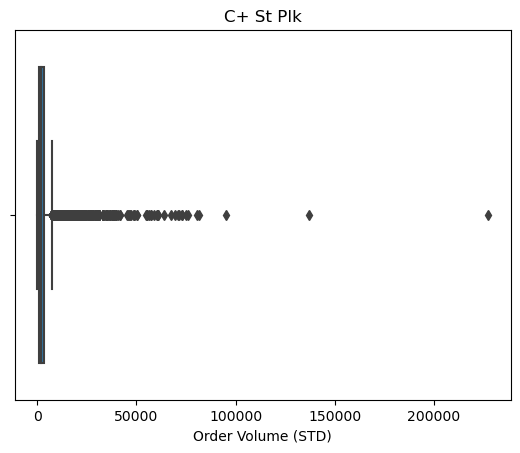

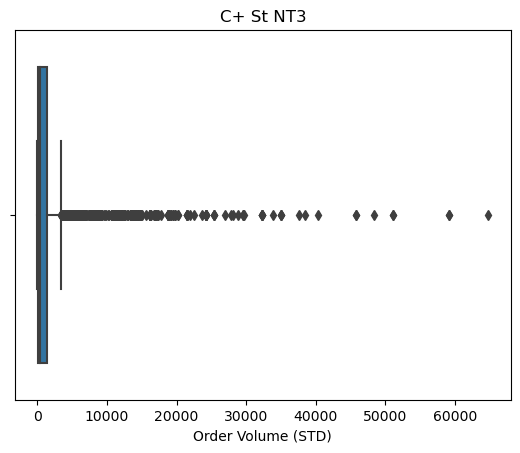

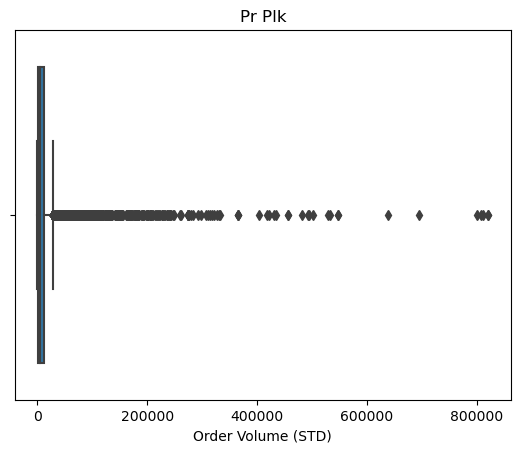

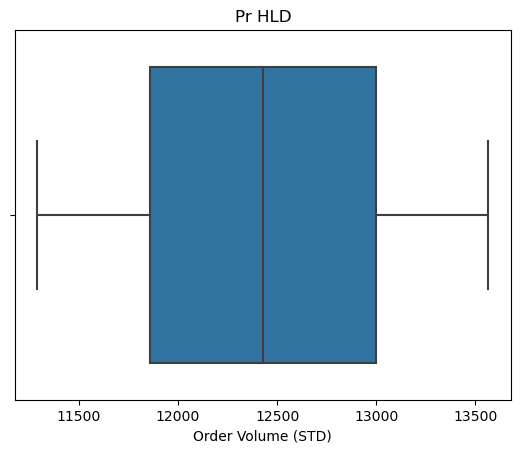

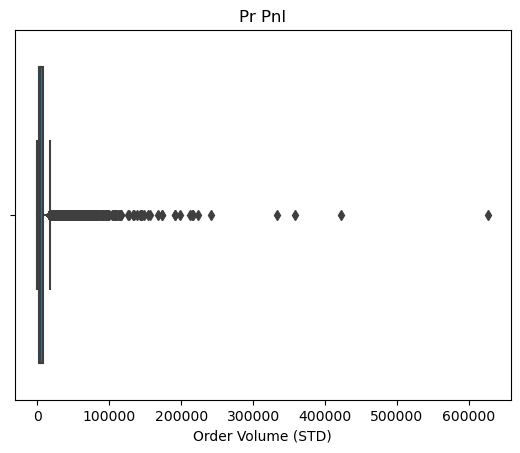

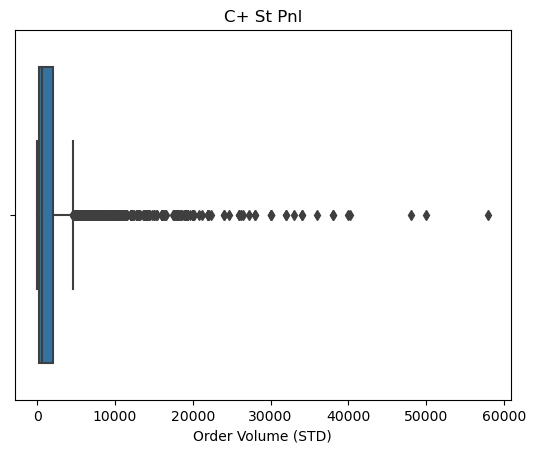

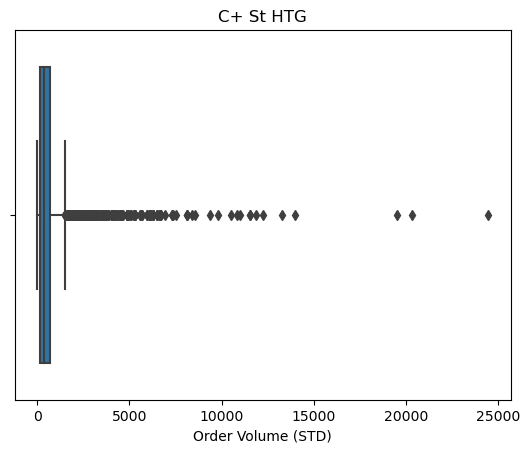

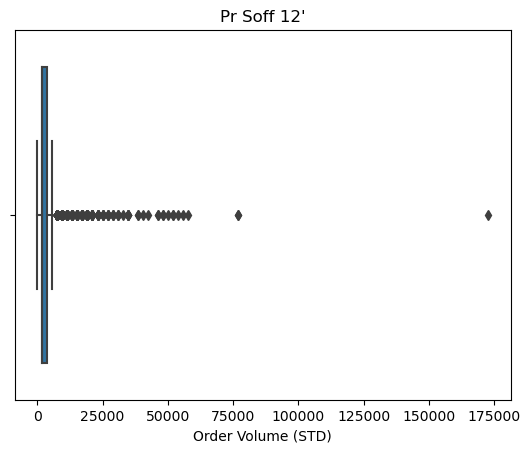

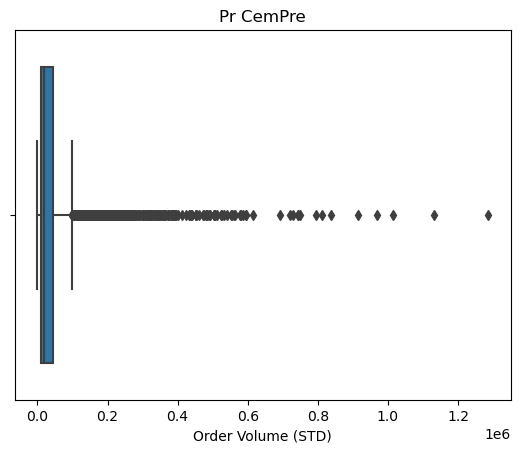

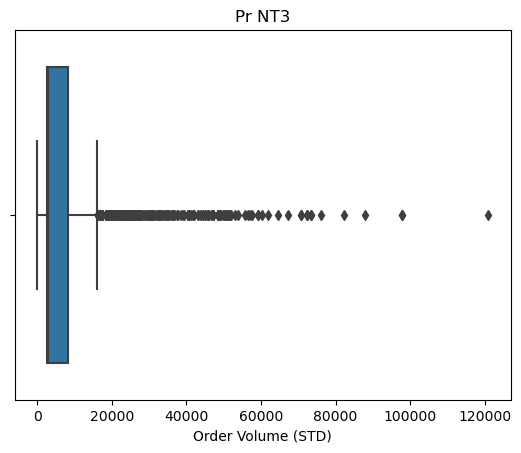

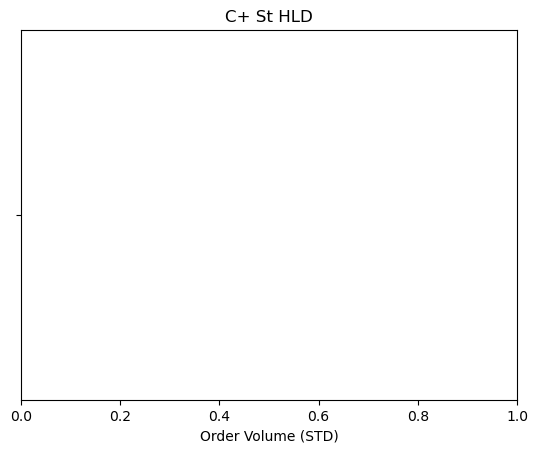

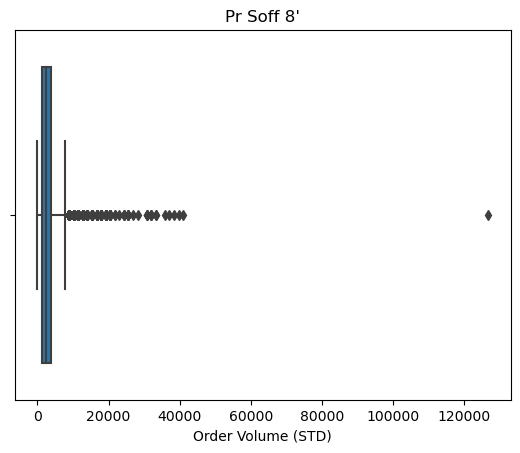

In [159]:
for i in forecast_groups:
    a=df.loc[df['forecast_group']==i]
    plt.title(i)
    sns.boxplot(data=a,x='Order Volume (STD)')
    plt.show()

In [160]:
df.loc[df['forecast_group']==i]

,Fiscal - YY,Fiscal - Period,Fiscal - Period Name,Fiscal - Current Period,Fiscal - Current YY,Order Create Date,Region Name,District Name,forecast_group,Product Segment,...,Product Type,Product Finish,Color Type,Size,Product Family,Product Group,HZ Type Zone,Product No,Order Volume (STD),Order Volume (SQFT)
718,FY14,1.0,Apr,2.0,FY24,4/1/13,Mountain,Denver,Pr Soff 8',Exterior,...,NON-VENTED SOFFIT,PRIME,None,24.000 X 96.000,SOF - Soffit,SOF - JH Cedarmill 8 HZ5,HZ5,617502.0,2560.0,3200.0
719,FY14,1.0,Apr,2.0,FY24,4/1/13,Mountain,Denver,Pr Soff 8',Exterior,...,VENTED SOFFIT,PRIME,None,24.000 X 96.000,SOF - Soffit,SOF - JH V Cedarmill 8 HZ5,HZ5,617535.0,6400.0,8000.0
744,FY14,1.0,Apr,2.0,FY24,4/1/13,Mountain,Northern Rockies,Pr Soff 8',Exterior,...,NON-VENTED SOFFIT,PRIME,NOT APPLICABLE,48.000 X 96.000,SOF - Soffit,SOF - Cem Cedarmill 8,HZ10,336560.0,1280.0,1600.0
1979,FY14,1.0,Apr,2.0,FY24,4/2/13,Mountain,Denver,Pr Soff 8',Exterior,...,NON-VENTED SOFFIT,PRIME,None,24.000 X 96.000,SOF - Soffit,SOF - JH Cedarmill 8 HZ5,HZ5,617502.0,3840.0,4800.0
1980,FY14,1.0,Apr,2.0,FY24,4/2/13,Mountain,Denver,Pr Soff 8',Exterior,...,NON-VENTED SOFFIT,PRIME,None,24.000 X 96.000,SOF - Soffit,SOF - JH Smooth 8 HZ5,HZ5,617508.0,3840.0,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4710038,FY24,4.0,Jul,5.0,FY24,7/28/23,Mountain,Denver,Pr Soff 8',Exterior,...,NON-VENTED SOFFIT,PRIME,None,24.000 X 96.000,SOF - Soffit,SOF - JH Cedarmill 8 HZ5,HZ5,617502.0,6400.0,8000.0
4710039,FY24,4.0,Jul,5.0,FY24,7/28/23,Mountain,Denver,Pr Soff 8',Exterior,...,NON-VENTED SOFFIT,PRIME,None,24.000 X 96.000,SOF - Soffit,SOF - JH Smooth 8 HZ5,HZ5,617508.0,2560.0,3200.0
4710040,FY24,4.0,Jul,5.0,FY24,7/28/23,Mountain,Denver,Pr Soff 8',Exterior,...,VENTED SOFFIT,PRIME,None,24.000 X 96.000,SOF - Soffit,SOF - JH V Smooth 8 HZ5,HZ5,617536.0,2560.0,3200.0
4712012,FY24,4.0,Jul,5.0,FY24,7/31/23,Mountain,Northern Rockies,Pr Soff 8',Exterior,...,NON-VENTED SOFFIT,PRIME,None,24.000 X 96.000,SOF - Soffit,SOF - JH Smooth 8 HZ5,HZ5,617508.0,2560.0,3200.0


In [164]:
for i in forecast_groups:
    a=df.loc[df['forecast_group']==i]
    d=a['Order Volume (STD)'].describe()
    print(d['std'],i)

4259.639774652608 C+ St Plk
3329.7735040932594 C+ St NT3
28460.540803349893 Pr Plk
1609.6578766930566 Pr HLD
13125.4291453142 Pr Pnl
2735.0710247718744 C+ St Pnl
1027.8860115461175 C+ St HTG
5305.679869606304 Pr Soff 12'
64923.29584604649 Pr CemPre
8505.37303156036 Pr NT3
nan C+ St HLD
3679.0019965037395 Pr Soff 8'


In [106]:
df.groupby(['year', 'month'])['Order Volume (STD)'].sum().reset_index()

,year,month,Order Volume (STD)
0,2013,4,6411671.02
1,2013,5,6815792.35
2,2013,6,5341033.39
3,2013,7,6278826.59
4,2013,8,6210525.35
...,...,...,...
119,2023,3,10756256.43
120,2023,4,8236422.83
121,2023,5,10246838.61
122,2023,6,11656715.87


In [107]:
for i in forecast_groups:
    a=df.loc[df['forecast_group']==i]
    print(a.isnull().sum())
    # sns.boxplot(data=a,x='Order Volume (STD)')
    # plt.show()

Order Create Date     0
Order Volume (STD)    0
Region Name           0
forecast_group        0
year                  0
month                 0
dtype: int64
Order Create Date     0
Order Volume (STD)    0
Region Name           0
forecast_group        0
year                  0
month                 0
dtype: int64
Order Create Date     0
Order Volume (STD)    0
Region Name           0
forecast_group        0
year                  0
month                 0
dtype: int64
Order Create Date     0
Order Volume (STD)    0
Region Name           0
forecast_group        0
year                  0
month                 0
dtype: int64
Order Create Date     0
Order Volume (STD)    0
Region Name           0
forecast_group        0
year                  0
month                 0
dtype: int64
Order Create Date     0
Order Volume (STD)    0
Region Name           0
forecast_group        0
year                  0
month                 0
dtype: int64
Order Create Date     0
Order Volume (STD)    0
Region Nam

In [108]:
df.columns

Index(['Order Create Date', 'Order Volume (STD)', 'Region Name',
       'forecast_group', 'year', 'month'],
      dtype='object')

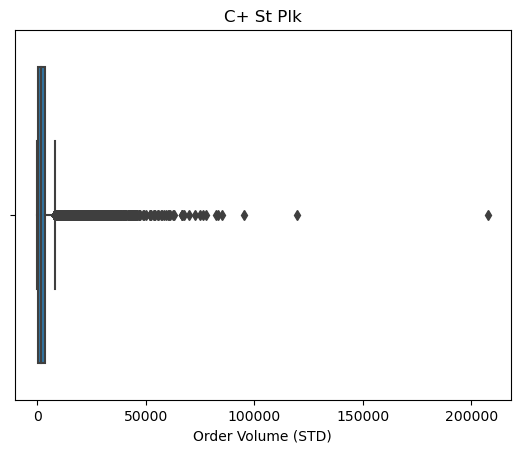

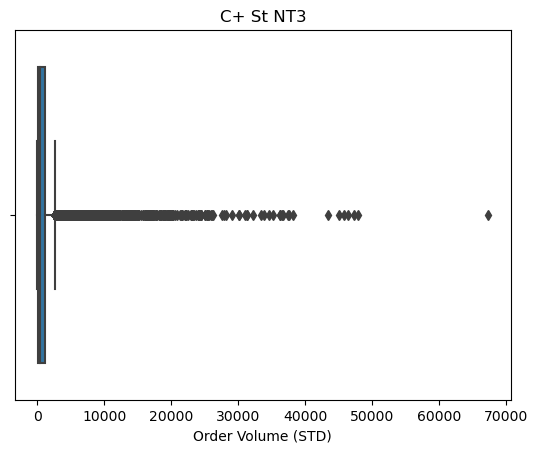

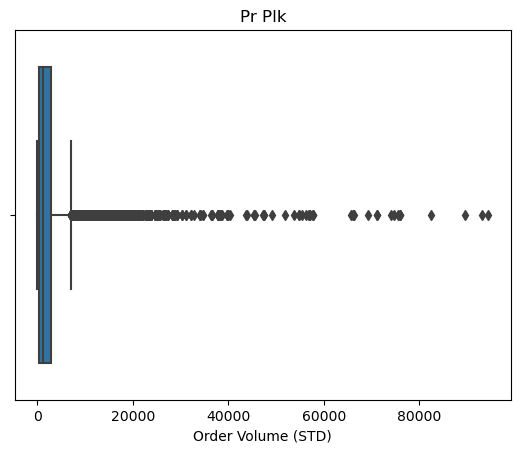

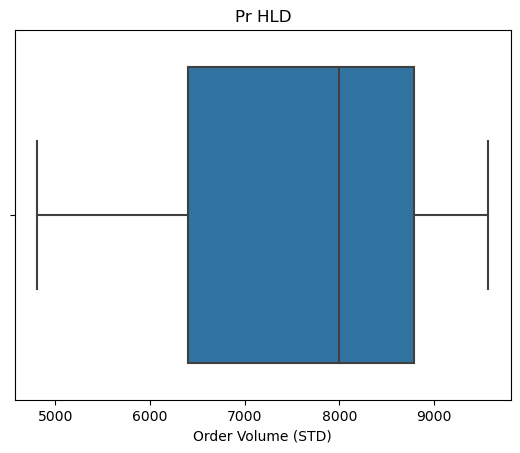

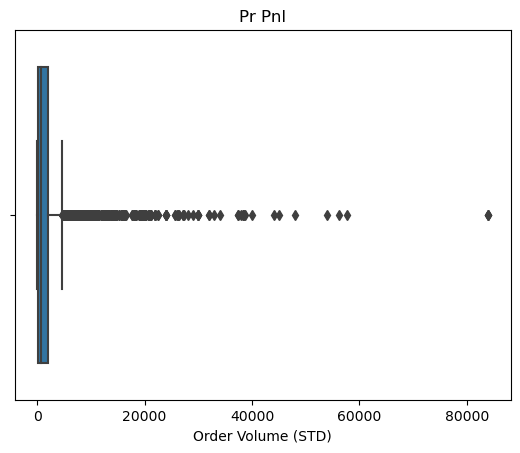

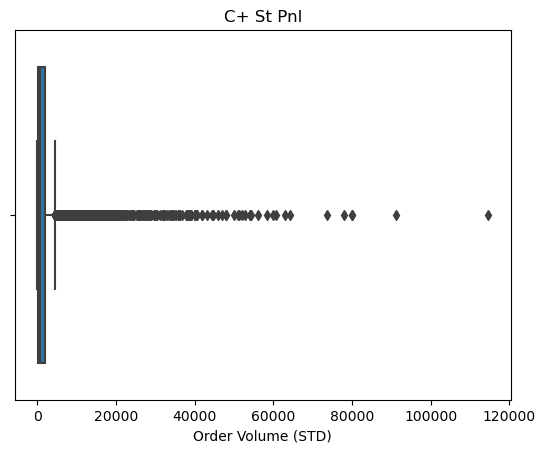

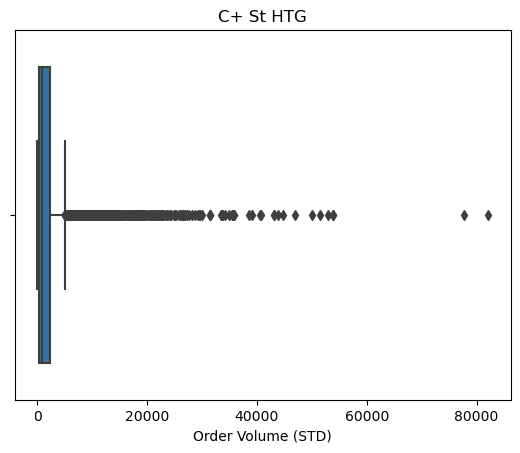

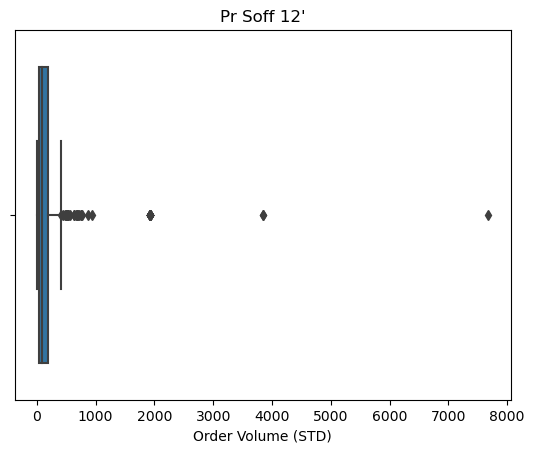

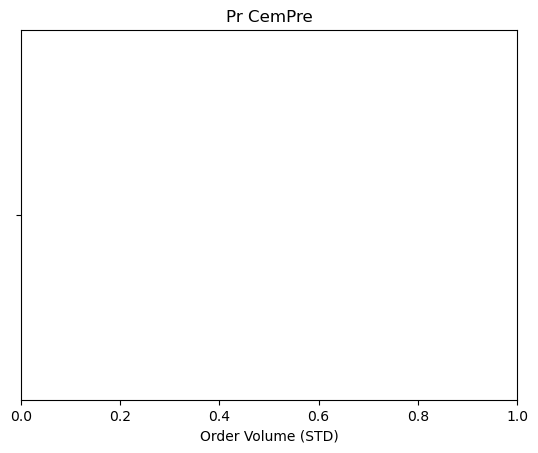

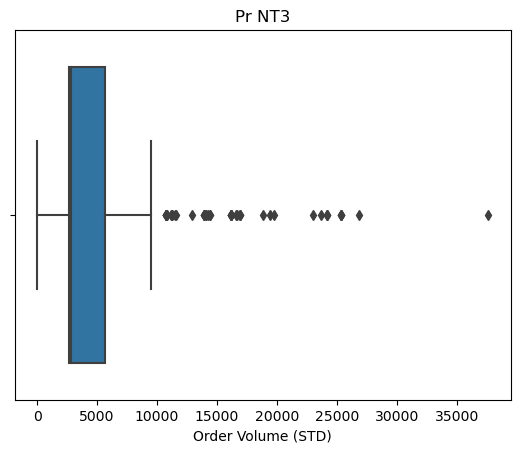

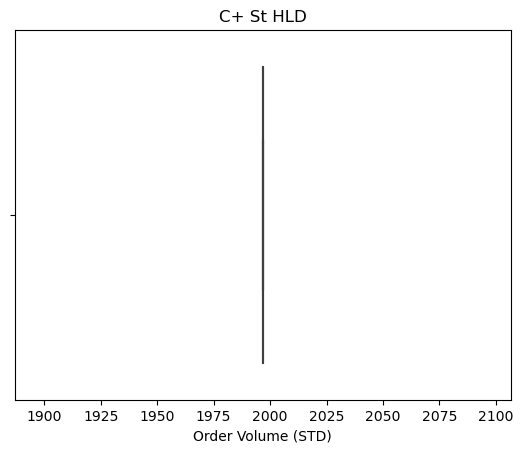

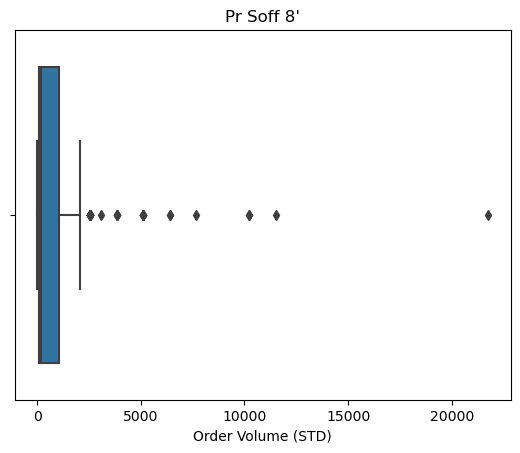

In [109]:
for i in forecast_groups:
    a=df.loc[df['forecast_group']==i]
    plt.title(i)
    sns.boxplot(data=a,x='Order Volume (STD)')
    plt.show()

In [110]:
df_C=df[df['forecast_group']=='C+ St Plk']

In [111]:
df_C.sort_values(by='Order Create Date')
df_C['year'] = df_C['Order Create Date'].dt.year
df_C['month'] = df_C['Order Create Date'].dt.month

In [112]:
df_C=df_C.groupby(['year', 'month'])['Order Volume (STD)'].sum().reset_index()

In [113]:
df_C['date']=df_C['year'].astype('string')+'-'+df_C['month'].astype('string')+'-01'
df_C.set_index('date',inplace=True)

<AxesSubplot:xlabel='date'>

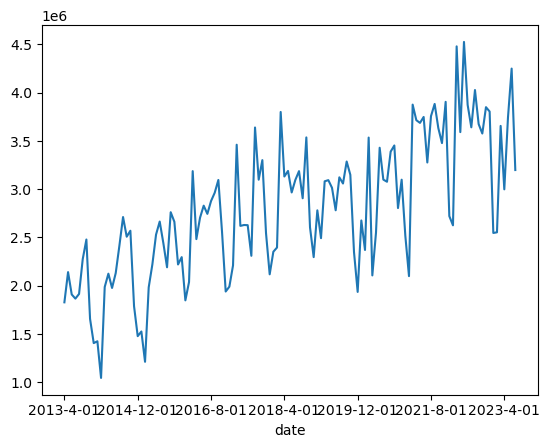

In [115]:
df_C['Order Volume (STD)'].plot()

In [116]:
df

,Order Create Date,Order Volume (STD),Region Name,forecast_group,year,month
0,2013-04-01,60.00,North Atlantic,C+ St Batt,2013,4
1,2013-04-01,10500.00,North Atlantic,C+ St Plk,2013,4
2,2013-04-01,1750.00,North Atlantic,C+ St Plk,2013,4
3,2013-04-01,2368.00,North Atlantic,C+ St NT3,2013,4
4,2013-04-01,2308.80,North Atlantic,C+ St NT3,2013,4
...,...,...,...,...,...,...
346285,2023-07-31,367.50,North Atlantic,C+ St Plk,2023,7
346286,2023-07-31,52.50,North Atlantic,C+ St Plk,2023,7
346287,2023-07-31,8652.00,North Atlantic,C+ St Plk,2023,7
346288,2023-07-31,5906.25,North Atlantic,C+ St Plk,2023,7


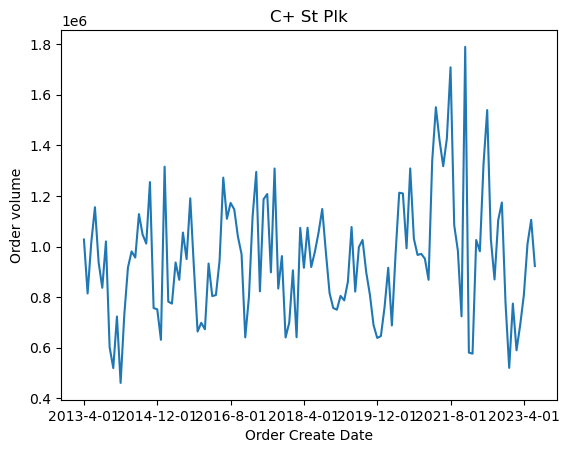

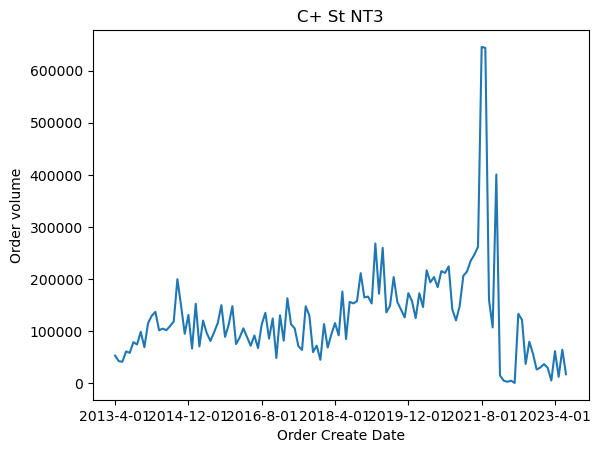

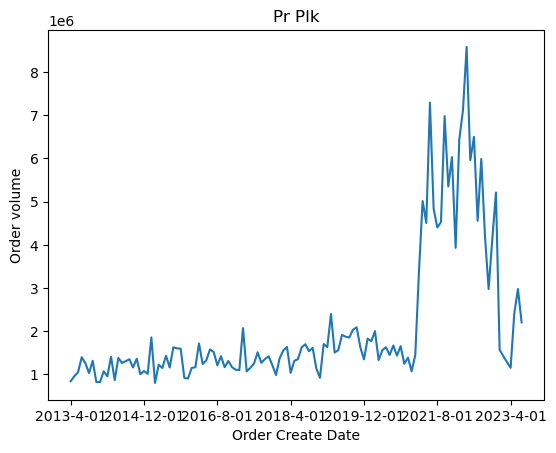

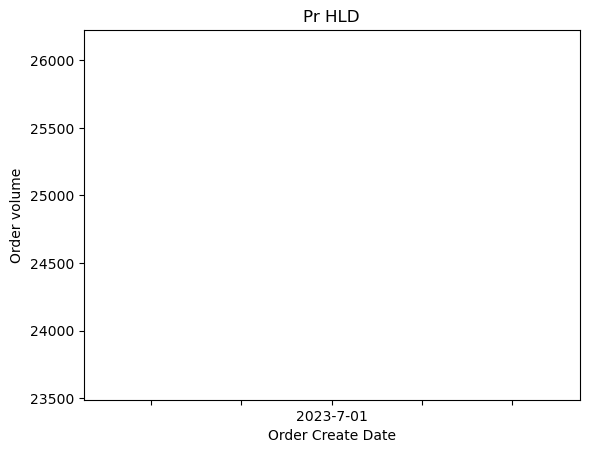

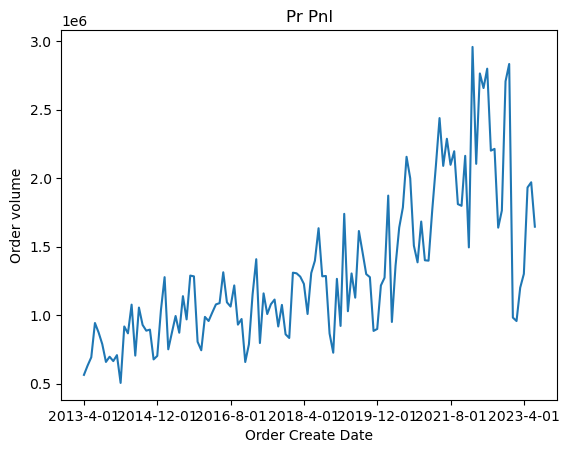

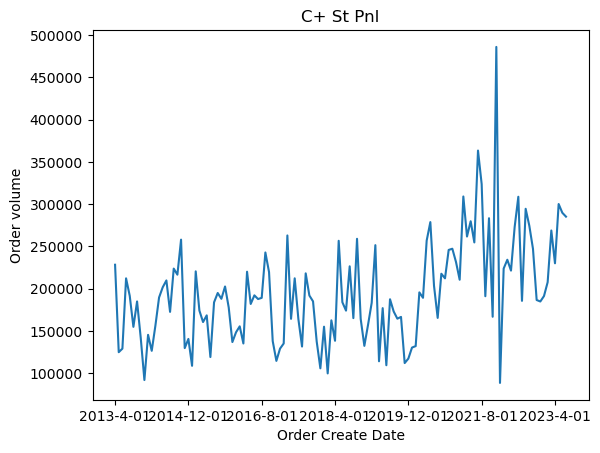

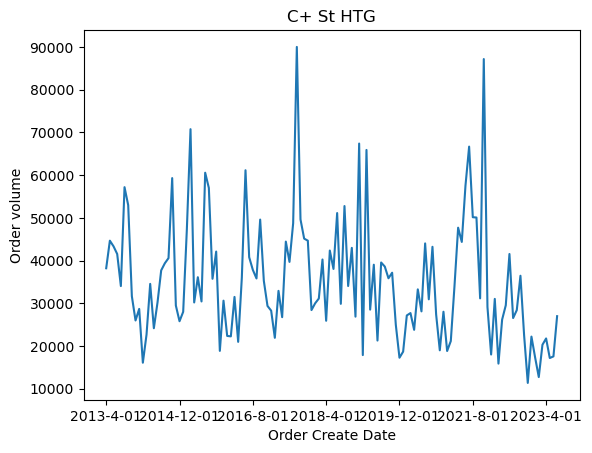

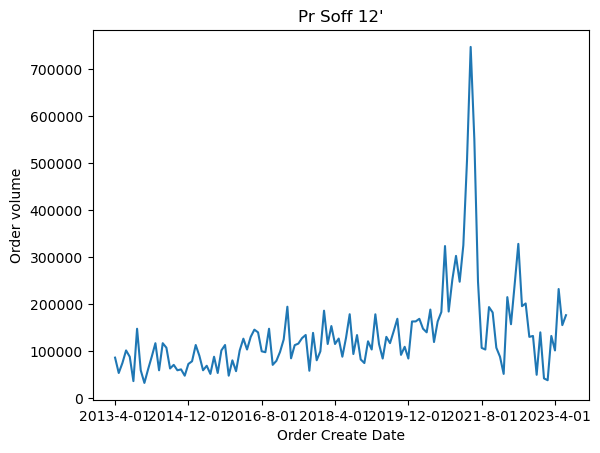

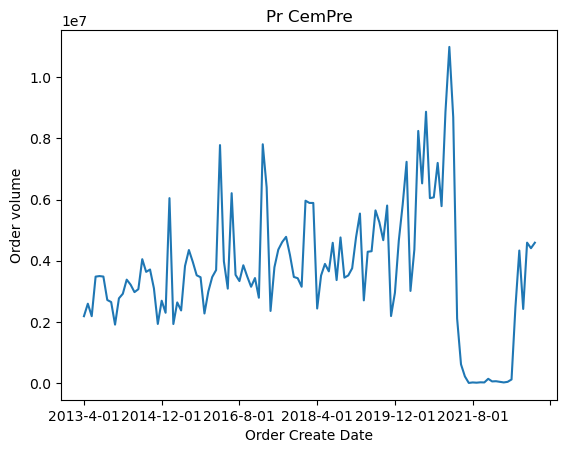

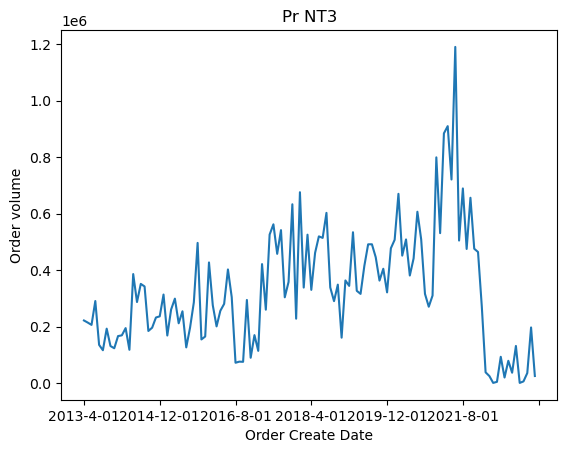

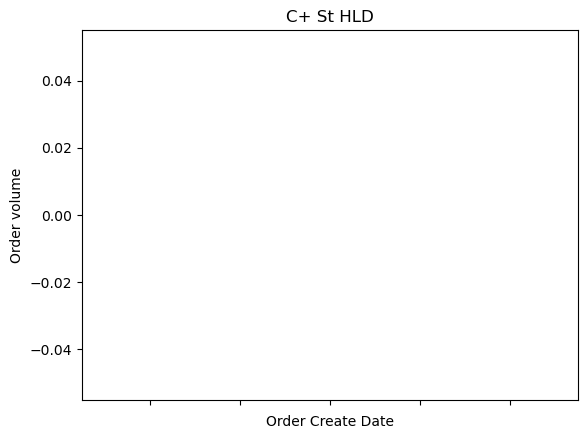

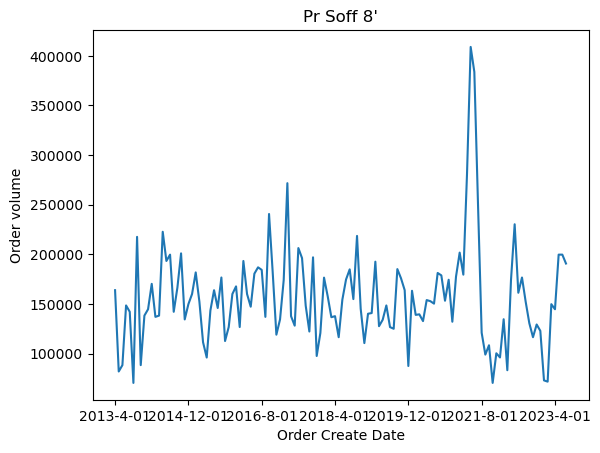

In [131]:
for i in forecast_groups:
    df_C=df[df['forecast_group']==i]
    df_C=df_C.sort_values(by='Order Create Date')
    df_C['Order Create Date']=pd.to_datetime(df_C['Order Create Date'])
    df_C['year'] = df_C['Order Create Date'].dt.year
    df_C['month'] = df_C['Order Create Date'].dt.month
    df_C=df_C.groupby(['year', 'month'])['Order Volume (STD)'].sum().reset_index()
    df_C['date']=df_C['year'].astype('string')+'-'+df_C['month'].astype('string')+'-01'
    df_C.set_index('date',inplace=True)
    a=df_C['Order Volume (STD)']
    a.plot()
    plt.title(i)
    plt.ylabel('Order volume')
    plt.xlabel('Order Create Date')
    plt.show()
    

In [156]:
df_C=df[df['forecast_group']=='Pr HLD']

In [145]:
forecast_groups

['C+ St Plk',
 'C+ St NT3',
 'Pr Plk',
 'Pr HLD',
 'Pr Pnl',
 'C+ St Pnl',
 'C+ St HTG',
 "Pr Soff 12'",
 'Pr CemPre',
 'Pr NT3',
 'C+ St HLD',
 "Pr Soff 8'"]

In [155]:
df.forecast_group.unique()

array(['C+ St Pnl', 'C+ St BHT', 'C+ St NT3', 'C+ St Plk',
       "C+ St Soff 12'", "C+ St Soff 8'", 'Int 1/2 Inch', "Int 1/4 4'",
       'Int 1/4 Inch', 'Pr BHT', 'Pr CemPre', 'Pr Plk', 'Pr Pnl',
       "Pr Soff 12'", "Pr Soff 8'", 'Pr HTG', 'C+ St HTG', 'Pr Asp',
       'Pr NT3', 'Pr MD', 'C+ St VL', 'C+ St Batt', 'Pr Batt',
       'C+ Dr Pnl', 'C+ Dr NT3', 'C+ Dr Plk', 'C+ Dr BHT',
       "C+ Dr Soff 8'", 'C+ Dr HTG', "C+ Dr Soff 12'", 'Int Hyd',
       'C+ Dr Batt', 'Pr Neo', 'C+ Ma BHT', 'C+ Ma Pnl', 'C+ Ma Plk',
       'C+ Ma NT3', "C+ Ma Soff 12'", 'C+ Ma HTG', 'Pr HLD'], dtype=object)

In [157]:
df_C

,Fiscal - YY,Fiscal - Period,Fiscal - Period Name,Fiscal - Current Period,Fiscal - Current YY,Order Create Date,Region Name,District Name,forecast_group,Product Segment,...,Product Type,Product Finish,Color Type,Size,Product Family,Product Group,HZ Type Zone,Product No,Order Volume (STD),Order Volume (SQFT)
4711964,FY24,4.0,Jul,5.0,FY24,7/31/23,Mountain,Denver,Pr HLD,Exterior,...,HLD TECH,PRIME,NOT APPLICABLE,3.500 X 144.000,TRM - All Prime,TRM - JH 4/4 HLD Rustic 12 HZ10,HZ10,216660.0,11289.6,4704.0
4711965,FY24,4.0,Jul,5.0,FY24,7/31/23,Mountain,Denver,Pr HLD,Exterior,...,HLD TECH,PRIME,None,2.500 X 144.000,TRM - All Prime,TRM - JH 4/4 Battens Rustic 12 HZ10,HZ10,9000049.0,13566.0,5652.5


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

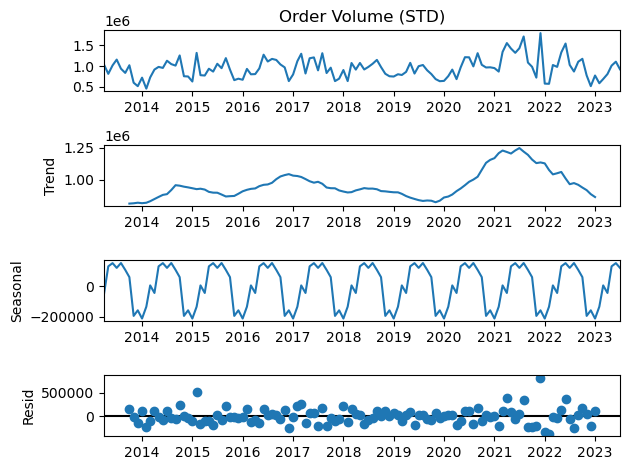

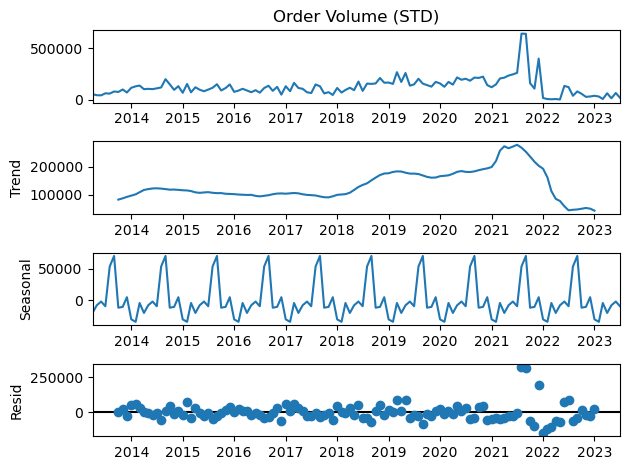

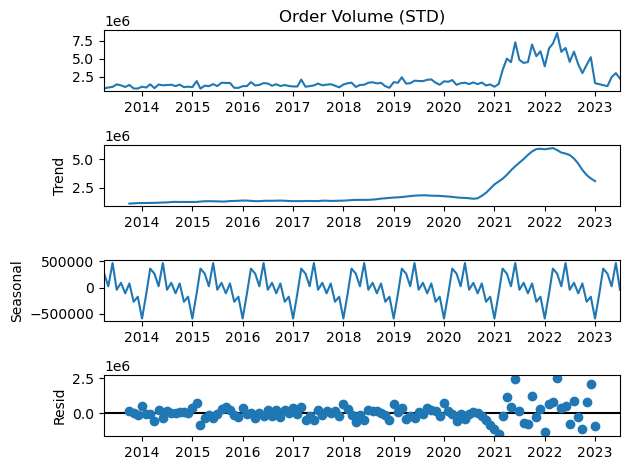

In [173]:
for i in forecast_groups:
    df_C=df[df['forecast_group']==i]
    df_C['Order Create Date']=pd.to_datetime(df_C['Order Create Date'])
    df_C=df_C.sort_values(by='Order Create Date')
    df_C['year'] = df_C['Order Create Date'].dt.year
    df_C['month'] = df_C['Order Create Date'].dt.month
    df_C=df_C.groupby(['year', 'month'])['Order Volume (STD)'].sum().reset_index()
    df_C['date']=df_C['year'].astype('string')+'-'+df_C['month'].astype('string')+'-01'
    df_C.set_index('date',inplace=True)
    a=df_C['Order Volume (STD)']
    a.index=pd.to_datetime(a.index)
    a.index.freq='MS'
    sd=seasonal_decompose(a)
    sd.plot();

In [175]:
forecast_groups

['C+ St Plk',
 'C+ St NT3',
 'Pr Plk',
 'Pr HLD',
 'Pr Pnl',
 'C+ St Pnl',
 'C+ St HTG',
 "Pr Soff 12'",
 'Pr CemPre',
 'Pr NT3',
 'C+ St HLD',
 "Pr Soff 8'"]

In [317]:
df_C=df[df['forecast_group']=="Pr NT3"]
df_C['Order Create Date']=pd.to_datetime(df_C['Order Create Date'])
df_C=df_C.sort_values(by='Order Create Date')
df_C['year'] = df_C['Order Create Date'].dt.year
df_C['month'] = df_C['Order Create Date'].dt.month

df_C=df_C.groupby(['year', 'month'])['Order Volume (STD)'].sum().reset_index()
df_C['date']=df_C['year'].astype('string')+'-'+df_C['month'].astype('string')+'-01'
df_C.set_index('date',inplace=True)
a=df_C['Order Volume (STD)']
a.index=pd.to_datetime(a.index) 
a=a.dropna()
a.index.freq='MS'
# a.index.asfreq('MS')
sd=seasonal_decompose(a)
sd.plot();

ValueError: Inferred frequency None from passed values does not conform to passed frequency MS

In [318]:
a.to_csv('delete.csv')

date
2013-04-01    52899.0
2013-05-01    42361.6
2013-06-01    41104.0
2013-07-01    60985.0
2013-08-01    58203.2
               ...   
2023-03-01     5032.8
2023-04-01    61505.6
2023-05-01    12307.2
2023-06-01    64340.8
2023-07-01    17272.0
Name: Order Volume (STD), Length: 124, dtype: float64


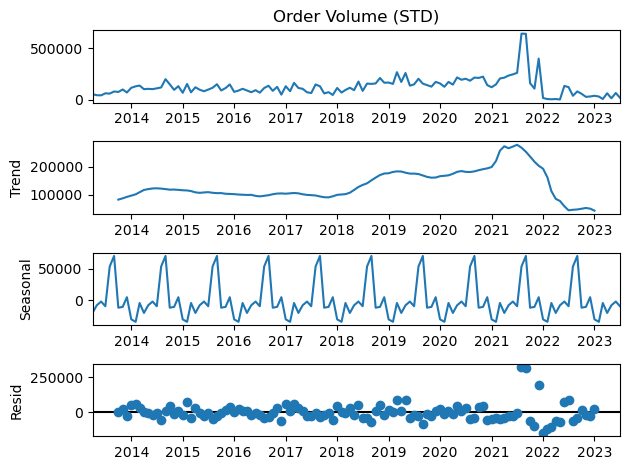

In [290]:
df_C=df[df['forecast_group']=="C+ St NT3"]
df_C['Order Create Date']=pd.to_datetime(df_C['Order Create Date'])
df_C=df_C.sort_values(by='Order Create Date')
df_C['year'] = df_C['Order Create Date'].dt.year
df_C['month'] = df_C['Order Create Date'].dt.month
df_C=df_C.groupby(['year', 'month'])['Order Volume (STD)'].sum().reset_index()
df_C['date']=df_C['year'].astype('string')+'-'+df_C['month'].astype('string')+'-01'
df_C.set_index('date',inplace=True)
a=df_C['Order Volume (STD)']
a.index=pd.to_datetime(a.index) 
print(a)
a.index.freq='MS'
sd=seasonal_decompose(a)
sd.plot();

In [278]:
a.index.freq='MS'

In [300]:
a[100:120]

date
2021-08-01      19800.0
2021-09-01      11730.0
2021-11-01      23760.0
2022-06-01      19800.0
2022-07-01     138600.0
2022-08-01      53460.0
2022-09-01      59400.0
2022-10-01      39600.0
2022-11-01      19800.0
2022-12-01      39600.0
2023-01-01     117050.0
2023-02-01    2476436.0
2023-03-01    4334334.0
2023-04-01    2423607.0
2023-05-01    4592504.0
2023-06-01    4410909.0
2023-07-01    4590694.0
Name: Order Volume (STD), dtype: float64

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(-20.0, 0, '2021-5-01'),
  Text(0.0, 0, '2013-4-01'),
  Text(20.0, 0, '2014-12-01'),
  Text(40.0, 0, '2016-8-01'),
  Text(60.0, 0, '2018-4-01'),
  Text(80.0, 0, '2019-12-01'),
  Text(100.0, 0, '2021-8-01'),
  Text(120.0, 0, ''),
  Text(140.0, 0, '')])

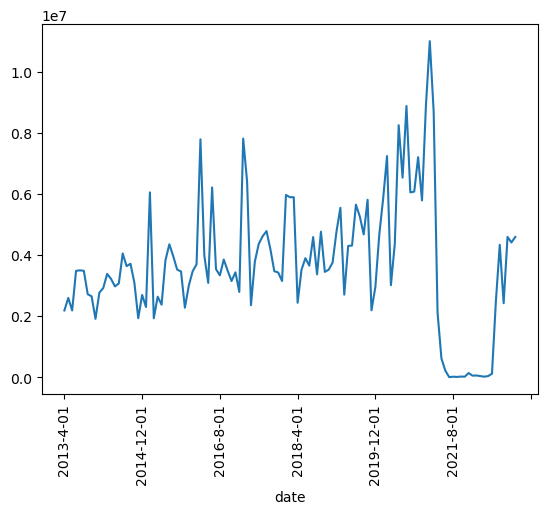

In [287]:
a.plot()
plt.xticks(rotation=90)

(array([528, 540, 552, 564, 576, 588, 600, 612, 624, 636]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

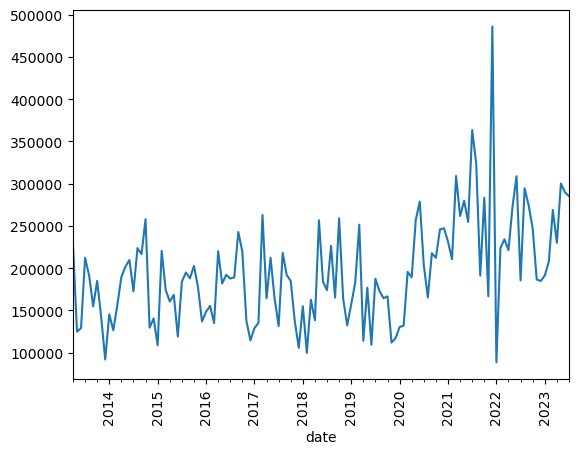

In [292]:
a.plot()
plt.xticks(rotation=90)

In [240]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")


In [241]:
adf_test(a.dropna())

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.134474
p-value                   0.000849
# lags used              13.000000
# observations          103.000000
critical value (1%)      -3.495493
critical value (5%)      -2.890037
critical value (10%)     -2.581971
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [243]:
a.dropna()

date
2013-04-01    2186463.00
2013-05-01    2595139.00
2013-06-01    2186490.25
2013-07-01    3481241.25
2013-08-01    3498964.00
                 ...    
2023-03-01    4334334.00
2023-04-01    2423607.00
2023-05-01    4592504.00
2023-06-01    4410909.00
2023-07-01    4590694.00
Name: Order Volume (STD), Length: 117, dtype: float64